Data Reading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from tabulate import tabulate

# ====================================
# 📂 Step 2: Load Data
# ====================================
movies = pd.read_csv("../dataset/movie.csv")
ratings = pd.read_csv("../dataset/rating.csv")

# Display top rows
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Missing in movies: movieId    0
title      0
genres     0
dtype: int64
Missing in ratings: userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


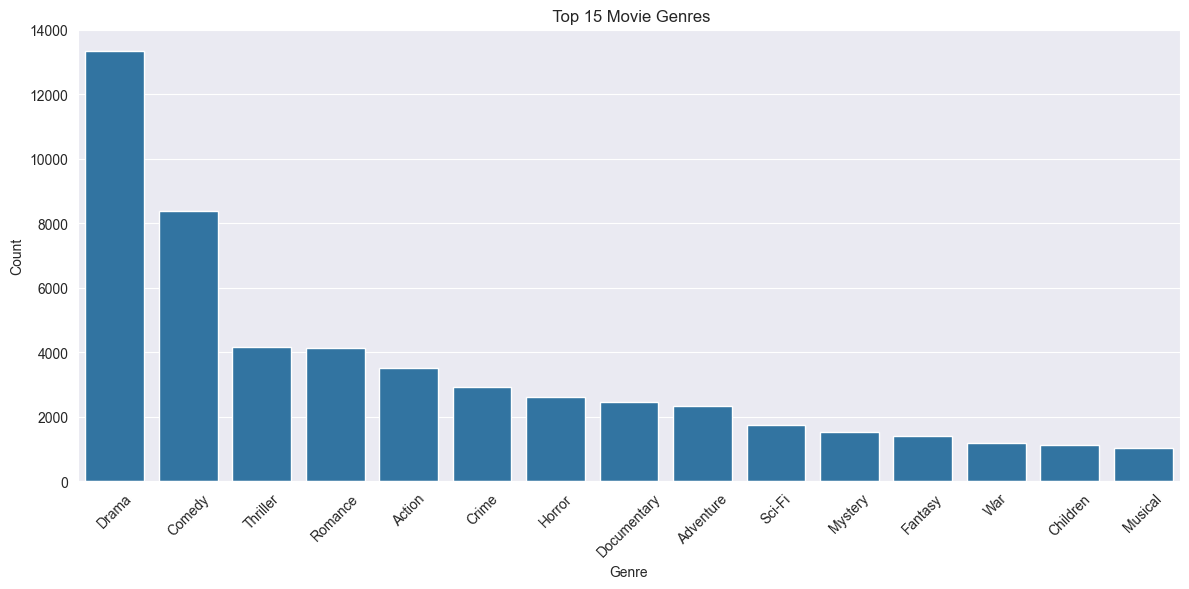

,movieId,title,genres,avg_rating
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3.921240
1,2,Jumanji (1995),Adventure Children Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy Drama Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [3]:
#====================================
# 🧹 Step 3: Preprocessing
# ====================================
# Handle missing values
print("Missing in movies:", movies.isnull().sum())
print("Missing in ratings:", ratings.isnull().sum())

# Drop duplicates
movies.drop_duplicates(inplace=True)

# Merge average ratings into movie dataset
avg_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
avg_ratings.columns = ['movieId', 'avg_rating']
movies = pd.merge(movies, avg_ratings, on='movieId', how='left')

# Fill missing genres with empty string
movies['genres'] = movies['genres'].fillna('')
# Replace "|" with spaces in genres
movies['genres'] = movies['genres'].str.replace('|', ' ', regex=False)


# Visual representation of top genres
genre_counts = movies['genres'].str.split().explode().value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index[:15], y=genre_counts.values[:15])
plt.xticks(rotation=45)
plt.title(" Top 15 Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# cleaned dataset
movies.head()

In [24]:
# ====================================
# 📦 Step 4: Save Processed Data
# ====================================
movies.to_csv("processed_movies.csv", index=False)
print("✅ Saved processed data to processed_movies.csv")

✅ Saved processed data to processed_movies.csv


In [7]:
# ====================================
# 🧠 Step 5: TF-IDF on Genres (using saved data)
# ====================================
# Load the processed data
processed_movies = pd.read_csv("../notebook/processed_movies.csv")

tfidf = TfidfVectorizer()  # No need for custom `token_pattern
tfidf_matrix = tfidf.fit_transform(processed_movies['genres'])
# Show shape
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Check feature names (genres)
print("\n📢 TF-IDF Feature Names (Genres):")
print(tfidf.get_feature_names_out()[:10])  # Show first 10 genres


TF-IDF matrix shape: (27278, 24)

📢 TF-IDF Feature Names (Genres):
['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'fi']


In [8]:
# ====================================
# 🤖 Step 6: Train KNN Model
# ====================================
# Using cosine similarity
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(tfidf_matrix)

# Save model
with open("../model/knn_movie_model.pkl", "wb") as file:
    pickle.dump(knn_model, file)

# Save tfidf vectorizer
with open("../model/tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf, file)

print("Models saved successfully")


Models saved successfully
